# Create the first graph

In this practice you will learn how:

1. Sample twitter's hose. Note that twitter only provides a sample of about 1% of the real time activity.
2. Learn the pickle library. Suited for storing data if the size is reasonble. Preserves the internal structure of the variables and makes it independent of the operating system.
3. Learn the basics of the library Networkx. ( https://networkx.org/)
4. Plot statistics about the extracted data.


### Load the libraries that will be needed

In [1]:
import io
import json
import tweepy
import time
import pandas as pd


### New libraries

In [2]:
import numpy as np
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle

## Initialize the twitter app

In [3]:
consumer_key = 'V1103K6fBfTpaBFjg29TyjJdd'
consumer_secret = 'a0Bqd5aMfYztORsi2sATZGfLKsEIY1RjpaLQcO2EQJE22vod21'
access_token =  '1573221700992471045-j9z7UH8EkUmCyQ5EKFK5sNhPCxrifh'
access_token_secret = 'IQ74ErJN0ngJjKAnUqobtcN2ghLp4PapaAa4ciZmIB14E'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


## Initialize a query  and explore the structure of the tweet



In [4]:
QUERY = 'Pääbo OR nobel or #NobelPrize'
tweets = api.search_tweets(QUERY, count=10, tweet_mode="extended")
print("Total:", len(tweets))

Total: 10


In [5]:
def Tweet2List(tweets):
    return [t._json for t in tweets]

df_tweet = pd.DataFrame(Tweet2List(tweets))
print(df_tweet['full_text'])

0    RT @RoySocChem: Are you ready to react to the ...
1    RT @NobelPrize: BREAKING NEWS: \nThe 2022 #Nob...
2    RT @GeneticsUnzip: You may have seen that Svan...
3    RT @GeneticsUnzip: You may have seen that Svan...
4    RT @GeneticsUnzip: You may have seen that Svan...
5    RT @GeneticsUnzip: You may have seen that Svan...
6    You may have seen that Svante Pääbo was awarde...
7    Alfred Nobel, born on October 21, 1833, is kno...
8    RT @GENbio: Svante Pääbo—First Evolutionary An...
9    RT @GENbio: Svante Pääbo—First Evolutionary An...
Name: full_text, dtype: object


### Lets operate a bit on the user information
### Lets flatten and  concat the flattened column

In [6]:
df_tweet['user'].iloc[0].keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type', 'withheld_in_countries'])

In [7]:
df_tweet_user = pd.DataFrame.from_dict(pd.json_normalize(df_tweet['user']))
df_tweet_user

,id,id_str,name,screen_name,location,description,url,protected,followers_count,friends_count,...,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries,entities.url.urls,entities.description.urls,profile_banner_url
0,182587889,182587889,Orgsyn In,orgsynin,,A website for organic chemist,http://t.co/lnz6BbNu9N,False,7,94,...,True,True,False,False,False,none,[],"[{'url': 'http://t.co/lnz6BbNu9N', 'expanded_u...",[],NaN
1,374881797,374881797,Mike Boyle,mike_boyle1,,,None,False,142,125,...,False,False,False,False,False,none,[],NaN,[],https://pbs.twimg.com/profile_banners/37488179...
2,1911165828,1911165828,Heredity,HeredityJournal,"Glasgow University, Scotland",The Genetics Society's journal covering a broa...,https://t.co/tW0Veohjsy,False,2280,644,...,True,False,False,False,False,none,[],"[{'url': 'https://t.co/tW0Veohjsy', 'expanded_...",[],https://pbs.twimg.com/profile_banners/19111658...
3,32588979,32588979,Kat Arney,Kat_Arney,London,Award-winning Storyteller of Science. PhD. Fou...,https://t.co/Z4DqeQ3kLZ,False,13562,4374,...,False,False,False,False,False,none,[],"[{'url': 'https://t.co/Z4DqeQ3kLZ', 'expanded_...","[{'url': 'https://t.co/EjEz8XVOaM', 'expanded_...",https://pbs.twimg.com/profile_banners/32588979...
4,925937306,925937306,Cahir O'Kane,OKaneCahir,"S Cambridgeshire, UK","Professor of Genetics, University of Cambridge...",https://t.co/kXaz8mlLkY,False,1276,624,...,True,False,False,False,False,none,[],"[{'url': 'https://t.co/kXaz8mlLkY', 'expanded_...",[],https://pbs.twimg.com/profile_banners/92593730...
5,1704982352,1704982352,GenSocUK,GenSocUK,,The Genetics Society was founded by William Ba...,https://t.co/pSUOu9QeRa,False,3756,312,...,False,False,False,False,False,none,[],"[{'url': 'https://t.co/pSUOu9QeRa', 'expanded_...",[],https://pbs.twimg.com/profile_banners/17049823...
6,1067124733173555202,1067124733173555202,GeneticsUnzipped,GeneticsUnzip,,Podcast from The Genetics Society @gensocuk.\n...,https://t.co/VNkbFutz2E,False,2930,1577,...,False,False,False,False,False,none,[],"[{'url': 'https://t.co/VNkbFutz2E', 'expanded_...","[{'url': 'https://t.co/0MbYF8N2kC', 'expanded_...",https://pbs.twimg.com/profile_banners/10671247...
7,803153132,803153132,Buddy4Study,Buddy4Study,India,Gateway to scholarship world 👨‍🎓,https://t.co/5kD7TSLoqm,False,23934,71,...,False,False,False,False,False,none,[],"[{'url': 'https://t.co/5kD7TSLoqm', 'expanded_...",[],https://pbs.twimg.com/profile_banners/80315313...
8,2742938653,2742938653,HubBucket Inc 🇺🇸 🇺🇦,HubBucket,"Brooklyn, NY",@HubBucket Inc | DigitalHealth | HealthIT | Me...,https://t.co/4gbRrQxCGU,False,5655,5658,...,False,False,False,False,False,none,[],"[{'url': 'https://t.co/4gbRrQxCGU', 'expanded_...",[],https://pbs.twimg.com/profile_banners/27429386...
9,2742938653,2742938653,HubBucket Inc 🇺🇸 🇺🇦,HubBucket,"Brooklyn, NY",@HubBucket Inc | DigitalHealth | HealthIT | Me...,https://t.co/4gbRrQxCGU,False,5655,5658,...,False,False,False,False,False,none,[],"[{'url': 'https://t.co/4gbRrQxCGU', 'expanded_...",[],https://pbs.twimg.com/profile_banners/27429386...


## <font color='red'>  Homework: (short)</font>
Read the information about the concat method of pandas. Important, note the difference between axis = 0 or 1.

Hint, use the following command
print(df_tweet.shape,df_tweet_user.shape,df_tweet_extend.shape)

In [8]:
df_tweet_extend = pd.concat([df_tweet,df_tweet_user],axis = 1)

print('Lets see look at the friends and followers')
print(df_tweet_extend[['followers_count','friends_count']])


Lets see look at the friends and followers
   followers_count  friends_count
0                7             94
1              142            125
2             2280            644
3            13562           4374
4             1276            624
5             3756            312
6             2930           1577
7            23934             71
8             5655           5658
9             5655           5658


In [9]:
print(df_tweet.shape,df_tweet_user.shape,df_tweet_extend.shape)

(10, 28) (10, 44) (10, 72)


### <font color='blue'> Answer: </font>
Concat method concatenates pandas objects along the specified axis, in this case axis 1, which stands for columns. If it had been concatenated along axis 0 the final shape would have been of 20 rows.

In [10]:
(pd.concat([df_tweet,df_tweet_user],axis = 0)).shape

(20, 68)

### <font color='blue'> Answer: </font>
It can be seen like joining the dataframes side by side (our case) or joining the dataframes one on top of the other (I believe the common columns are not added)

# Search for creating the graph
Note that the Flag controls if the old version is loaded.

## Limit given by Tweeter 450 tweets each 15 minutes.

###  Pickle
Is a way of saving python data into a file so that the internal structure of the variables is preserved. Note that is should be  independent of the operating system.  Note that collab might behave differently with pickle.

###  Beware!
Twitter from time to time **drops the connection**

If you know the command: "try .... except..."  think of a way of solving the problem.

**50%** of the code is spend on solving connection problems.
**Do not be afraid** in the next practices we will explain it.


In [11]:
# Flag for not having to recompute all the time the query
FLAG_LOAD_OLD_SEARCH = True

In [12]:
def Tweet2List(tweets):
    return [t._json for t in tweets]

if FLAG_LOAD_OLD_SEARCH:
    DataBase_df = pd.read_pickle('DataBase_df_v1.pkl')
else:
    # Name_FileResults = QUERY +'.json'

    DataBase = list()
    num_loaded_tweets = 0
    for Iteration in range(100):
        tweets = api.search_tweets(QUERY, count=100, tweet_mode="extended",wait_on_rate_limit=True)
        time.sleep(20.0)
        num_loaded_tweets += 100
        print(f'Iteration:{Iteration},num_loaded_tweets:{num_loaded_tweets}')
        df_tweet = pd.DataFrame(Tweet2List(tweets))
        df_tweet_user = pd.DataFrame.from_dict(pd.json_normalize(df_tweet['user']))
        df_tweet_user.drop(columns = ['id'],inplace = True)
        df_tweet_extend = pd.concat([df_tweet,df_tweet_user],axis = 1)
        df_tweet_extend.set_index('id',inplace = True)
        DataBase.append(df_tweet_extend) 

### Next we solve the problem that some samples of the list do not have common columns!!!
This is a json effect, we only have the observed values at the moment, which should not be common.

In [13]:
SelectedColumns = ['created_at',
 'id_str',
 'full_text',
 'truncated',
 'entities',
 'metadata',
 'source',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'lang',
 'extended_entities',
 'name',
 'screen_name',
 'location',
 'description',
 'followers_count',
 'friends_count',
 'listed_count',
 'favourites_count',
 'lang',
 'following',
 'follow_request_sent',
 'notifications']

In [14]:
if not FLAG_LOAD_OLD_SEARCH:
    df_tmp = [df[SelectedColumns] for df in DataBase]
    DataBase_df = pd.concat(df_tmp,axis = 0)
    DataBase_df.to_pickle('DataBase_df_v1.pkl')

In [15]:
DataBase_df['entities']

id
1577238249181184000    {'hashtags': [{'text': 'PrincipiaMag8', 'indic...
1577238247906086912    {'hashtags': [], 'symbols': [], 'user_mentions...
1577238246513602561    {'hashtags': [], 'symbols': [], 'user_mentions...
1577238246165479424    {'hashtags': [], 'symbols': [], 'user_mentions...
1577238238283980800    {'hashtags': [], 'symbols': [], 'user_mentions...
                                             ...                        
1577243424344145921    {'hashtags': [], 'symbols': [], 'user_mentions...
1577243422116958208    {'hashtags': [], 'symbols': [], 'user_mentions...
1577243421181607936    {'hashtags': [], 'symbols': [], 'user_mentions...
1577243416538533889    {'hashtags': [], 'symbols': [], 'user_mentions...
1577243408732561408    {'hashtags': [], 'symbols': [], 'user_mentions...
Name: entities, Length: 6300, dtype: object

### Next we flatten Entities

In [16]:
DataBase_df = pd.read_pickle('DataBase_df_v1.pkl')
EntitiesFlatten = pd.DataFrame.from_dict(pd.json_normalize(DataBase_df['entities']))
EntitiesFlatten.index = DataBase_df.index
DataBase_df2 = pd.concat([DataBase_df,EntitiesFlatten],axis = 1)
DataBase_df2.T

id,1577238249181184000,1577238247906086912,1577238246513602561,1577238246165479424,1577238238283980800,1577238237445488640,1577238235192840193,1577238230834941952,1577238229534666752,1577238228272226304,...,1577243430668816384,1577243430010654720,1577243428152541184,1577243427925676032,1577243427569139712,1577243424344145921,1577243422116958208,1577243421181607936,1577243416538533889,1577243408732561408
created_at,Tue Oct 04 10:04:36 +0000 2022,Tue Oct 04 10:04:36 +0000 2022,Tue Oct 04 10:04:36 +0000 2022,Tue Oct 04 10:04:36 +0000 2022,Tue Oct 04 10:04:34 +0000 2022,Tue Oct 04 10:04:34 +0000 2022,Tue Oct 04 10:04:33 +0000 2022,Tue Oct 04 10:04:32 +0000 2022,Tue Oct 04 10:04:32 +0000 2022,Tue Oct 04 10:04:31 +0000 2022,...,Tue Oct 04 10:25:12 +0000 2022,Tue Oct 04 10:25:12 +0000 2022,Tue Oct 04 10:25:11 +0000 2022,Tue Oct 04 10:25:11 +0000 2022,Tue Oct 04 10:25:11 +0000 2022,Tue Oct 04 10:25:10 +0000 2022,Tue Oct 04 10:25:10 +0000 2022,Tue Oct 04 10:25:10 +0000 2022,Tue Oct 04 10:25:08 +0000 2022,Tue Oct 04 10:25:07 +0000 2022
created_at,Sun Aug 08 02:06:41 +0000 2010,Tue May 02 09:25:36 +0000 2017,Wed Sep 01 07:42:19 +0000 2010,Fri Apr 24 12:09:12 +0000 2009,Thu Aug 02 10:29:28 +0000 2018,Thu Feb 25 07:26:47 +0000 2021,Tue Nov 06 12:28:47 +0000 2018,Thu Aug 06 18:38:42 +0000 2009,Tue Jun 16 18:48:58 +0000 2009,Sat May 08 06:03:02 +0000 2010,...,Sat Oct 01 07:24:36 +0000 2022,Thu Dec 13 13:19:52 +0000 2012,Sat Jan 08 21:43:33 +0000 2011,Tue Jul 05 16:51:50 +0000 2022,Wed Feb 18 01:38:27 +0000 2009,Thu Jun 11 22:49:54 +0000 2015,Sat Mar 21 18:43:11 +0000 2020,Tue Nov 20 12:09:37 +0000 2018,Sun Oct 06 10:11:12 +0000 2013,Thu Mar 26 08:18:54 +0000 2015
id_str,1577238249181184000,1577238247906086912,1577238246513602561,1577238246165479424,1577238238283980800,1577238237445488640,1577238235192840193,1577238230834941952,1577238229534666752,1577238228272226304,...,1577243430668816384,1577243430010654720,1577243428152541184,1577243427925676032,1577243427569139712,1577243424344145921,1577243422116958208,1577243421181607936,1577243416538533889,1577243408732561408
id_str,175933707,859338071648501760,185551414,34908698,1024965395613212673,1364839172213796864,1059784658626506752,63502414,47706812,141481865,...,1576110706809835522,1008808249,235697841,1544363337173143552,21156787,3319827461,1241435147041492992,1064853266050076672,1940489060,3117671981
full_text,"RT @Principia_io: Svante Pääbo, prota en #Prin...",RT @SanjeevUpadhy13: This year's Nobel Prizes ...,RT @EtienneKlein: Alain Aspect prix Nobel de p...,WATCH: Swedish scientist wins Nobel in medicin...,RT @jimalkhalili: 2022 Nobel Prize in Physics ...,RT @EsmeraldaJuggad: Ceux qui iront jusqu'à la...,"RT @dw_espanol: Científicos de Estados Unidos,...",@nytimes Pictured is the Nobel Peace Prize.,"Pour rappel, l'expérience d'Aspect remonte au ...",RT @NobelPrize: BREAKING NEWS: \nThe 2022 #Nob...,...,RT @JosephSeguraSLV: Félicitations à Alain Asp...,RT @TobiasHubinette: Varför har flertalet av d...,El premi Nobel de física reconeix l’experiment...,RT @lemondefr: Prix Nobel de physique 2022 : l...,#EsMalaNoticia que no ganemos un Nobel como el...,RT @EtienneKlein: Alain Aspect prix Nobel de p...,RT @Jedi_Sanfermin: Nobel de Física para Alain...,RT @vetenskapsakad: The laureates have each co...,@AFP Create a condition for a refugee crisis =...,@maskupsweden Absolut! Vi sänder här: https://...
truncated,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
entities,"{'hashtags': [{'text': 'PrincipiaMag8', 'indic...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [{'text': 'PremioNobel', 'indices...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions..

## Check the size of the DataFrame
Remember that the stream was broken

In [17]:
print('Number of Tweets harvested:{:d}'.format(len(DataBase_df)))

print('Number of columns:{:d}'.format(DataBase_df.shape[1]))

Number of Tweets harvested:6300
Number of columns:34


### Note the complexity of the some of the columns
* we have a dictionary as an element of the **cell**
* Note the instruction dropna(),  eliminates the rows with Nan

In [18]:
DataBase_df.extended_entities.dropna()

id
1577238237445488640    {'media': [{'id': 1577183906813673474, 'id_str...
1577238171309539328    {'media': [{'id': 1577238149461413890, 'id_str...
1577238161976983552    {'media': [{'id': 1577238132629639170, 'id_str...
1577238148534325248    {'media': [{'id': 1577236216231108609, 'id_str...
1577238146127126528    {'media': [{'id': 1577238037805043712, 'id_str...
                                             ...                        
1577243554543726592    {'media': [{'id': 1577188655323561988, 'id_str...
1577243540056596485    {'media': [{'id': 1577243501758128128, 'id_str...
1577243442744365057    {'media': [{'id': 1577243435240771584, 'id_str...
1577243437610442752    {'media': [{'id': 1577243434720628737, 'id_str...
1577243436981178368    {'media': [{'id': 1577243129580765184, 'id_str...
Name: extended_entities, Length: 569, dtype: object

### Lets look how complex is the object in the dataframe cell

In [19]:
print(DataBase_df.extended_entities.dropna().head(1).values)

[{'media': [{'id': 1577183906813673474, 'id_str': '1577183906813673474', 'indices': [101, 124], 'media_url': 'http://pbs.twimg.com/media/FeNIaC8XgAIxvmE.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FeNIaC8XgAIxvmE.jpg', 'url': 'https://t.co/gaqWRcu98h', 'display_url': 'pic.twitter.com/gaqWRcu98h', 'expanded_url': 'https://twitter.com/EsmeraldaJuggad/status/1577183911301775360/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 765, 'h': 998, 'resize': 'fit'}, 'large': {'w': 765, 'h': 998, 'resize': 'fit'}, 'small': {'w': 521, 'h': 680, 'resize': 'fit'}}, 'source_status_id': 1577183911301775360, 'source_status_id_str': '1577183911301775360', 'source_user_id': 1369570442751672320, 'source_user_id_str': '1369570442751672320'}]}]



### Solution: flatten the dictionary by means of json_normalize¶
* Explantaion: json_normalize takes a list of dictionaries of **dictionaris** and return an expanded list of dictionaris.
* Creation of a dataframe (pd.DataFrame.from_dict) from a list of dictionaries creates Nan in positions where the local dictionary had no members

In [20]:
DataBase_df['extended_entities'].isnull()

id
1577238249181184000    True
1577238247906086912    True
1577238246513602561    True
1577238246165479424    True
1577238238283980800    True
                       ... 
1577243424344145921    True
1577243422116958208    True
1577243421181607936    True
1577243416538533889    True
1577243408732561408    True
Name: extended_entities, Length: 6300, dtype: bool

In [21]:
DataBase_df[DataBase_df['extended_entities'].isnull() == False]['extended_entities']

id
1577238237445488640    {'media': [{'id': 1577183906813673474, 'id_str...
1577238171309539328    {'media': [{'id': 1577238149461413890, 'id_str...
1577238161976983552    {'media': [{'id': 1577238132629639170, 'id_str...
1577238148534325248    {'media': [{'id': 1577236216231108609, 'id_str...
1577238146127126528    {'media': [{'id': 1577238037805043712, 'id_str...
                                             ...                        
1577243554543726592    {'media': [{'id': 1577188655323561988, 'id_str...
1577243540056596485    {'media': [{'id': 1577243501758128128, 'id_str...
1577243442744365057    {'media': [{'id': 1577243435240771584, 'id_str...
1577243437610442752    {'media': [{'id': 1577243434720628737, 'id_str...
1577243436981178368    {'media': [{'id': 1577243129580765184, 'id_str...
Name: extended_entities, Length: 569, dtype: object

## <font color='red'> Homework: </font>
Write a small account explaining "why" of the procedure for extracting the entities below for finding the <font color='blue'> hastags: </font>.

In [22]:
DataBase_df

,created_at,created_at,id_str,id_str,full_text,truncated,entities,metadata,source,user,...,description,followers_count,friends_count,listed_count,favourites_count,lang,lang,following,follow_request_sent,notifications
id,,,,,,,,,,,,,,,,,,,,,
1577238249181184000,Tue Oct 04 10:04:36 +0000 2022,Sun Aug 08 02:06:41 +0000 2010,1577238249181184000,175933707,"RT @Principia_io: Svante Pääbo, prota en #Prin...",False,"{'hashtags': [{'text': 'PrincipiaMag8', 'indic...","{'iso_language_code': 'es', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...","{'id': 175933707, 'id_str': '175933707', 'name...",...,Somos el experimento fallido de aliens y se rí...,1085,3425,51,281896,es,None,False,False,False
1577238247906086912,Tue Oct 04 10:04:36 +0000 2022,Tue May 02 09:25:36 +0000 2017,1577238247906086912,859338071648501760,RT @SanjeevUpadhy13: This year's Nobel Prizes ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...","{'id': 859338071648501760, 'id_str': '85933807...",...,अहिंसा परमो धर्मः धर्म हिंसा तथैव च:l\n\n\n\n\...,250,878,0,29472,en,None,False,False,False
1577238246513602561,Tue Oct 04 10:04:36 +0000 2022,Wed Sep 01 07:42:19 +0000 2010,1577238246513602561,185551414,RT @EtienneKlein: Alain Aspect prix Nobel de p...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'fr', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...","{'id': 185551414, 'id_str': '185551414', 'name...",...,"""L'espèce humaine a choisi de mener une vie br...",259,394,61,19383,fr,None,False,False,False
1577238246165479424,Tue Oct 04 10:04:36 +0000 2022,Fri Apr 24 12:09:12 +0000 2009,1577238246165479424,34908698,WATCH: Swedish scientist wins Nobel in medicin...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...","{'id': 34908698, 'id_str': '34908698', 'name':...",...,All the latest breaking news from across South...,928809,3313,1890,3260,en,None,False,False,False
1577238238283980800,Tue Oct 04 10:04:34 +0000 2022,Thu Aug 02 10:29:28 +0000 2018,1577238238283980800,1024965395613212673,RT @jimalkhalili: 2022 Nobel Prize in Physics ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...","{'id': 1024965395613212673, 'id_str': '1024965...",...,Royal Society University Research Fellow in Co...,358,307,1,2468,en,None,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577243424344145921,Tue Oct 04 10:25:10 +0000 2022,Thu Jun 11 22:49:54 +0000 2015,1577243424344145921,3319827461,RT @EtienneKlein: Alain Aspect prix Nobel de p...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'fr', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...","{'id': 3319827461, 'id_str': '3319827461', 'na...",...,J'aime l'infiniment grand et petit.,5,368,1,1929,fr,None,False,False,False
1577243422116958208,Tue Oct 04 10:25:10 +0000 2022,Sat Mar 21 18:43:11 +0000 2020,1577243422116958208,1241435147041492992,RT @Jedi_Sanfermin: Nobel de Física para Alain...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'es', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...","{'id': 1241435147041492992, 'id_str': '1241435...",...,,169,653,1,136717,es,None,False,False,False
1577243421181607936,Tue Oct 04 10:25:10 +0000 2022,Tue Nov 20 12:09:37 +0000 2018,1577243421181607936,1064853266050076672,RT @vetenskapsakad: The laureates have each co...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...","{'id': 1064853266050076672, 'id_s

### <font color='blue'> Answer: </font>
We can actually see no elements were removed in this operation, since the rows are still 6300. However, I guess the intention of this is, since we are going to flatten the column of the dataframe, applying a json_normalize and then creating the dataframe from the dictionary of lists, is to avoid any entry with a null ['entities'] field so that there are no problems.

In [23]:
print('First eliminate elements that might give problems.\n\n')
FilteredDataBase_df = DataBase_df[DataBase_df['entities'].isnull() == False]
FilteredDataBase_df

First eliminate elements that might give problems.




,created_at,created_at,id_str,id_str,full_text,truncated,entities,metadata,source,user,...,description,followers_count,friends_count,listed_count,favourites_count,lang,lang,following,follow_request_sent,notifications
id,,,,,,,,,,,,,,,,,,,,,
1577238249181184000,Tue Oct 04 10:04:36 +0000 2022,Sun Aug 08 02:06:41 +0000 2010,1577238249181184000,175933707,"RT @Principia_io: Svante Pääbo, prota en #Prin...",False,"{'hashtags': [{'text': 'PrincipiaMag8', 'indic...","{'iso_language_code': 'es', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...","{'id': 175933707, 'id_str': '175933707', 'name...",...,Somos el experimento fallido de aliens y se rí...,1085,3425,51,281896,es,None,False,False,False
1577238247906086912,Tue Oct 04 10:04:36 +0000 2022,Tue May 02 09:25:36 +0000 2017,1577238247906086912,859338071648501760,RT @SanjeevUpadhy13: This year's Nobel Prizes ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...","{'id': 859338071648501760, 'id_str': '85933807...",...,अहिंसा परमो धर्मः धर्म हिंसा तथैव च:l\n\n\n\n\...,250,878,0,29472,en,None,False,False,False
1577238246513602561,Tue Oct 04 10:04:36 +0000 2022,Wed Sep 01 07:42:19 +0000 2010,1577238246513602561,185551414,RT @EtienneKlein: Alain Aspect prix Nobel de p...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'fr', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...","{'id': 185551414, 'id_str': '185551414', 'name...",...,"""L'espèce humaine a choisi de mener une vie br...",259,394,61,19383,fr,None,False,False,False
1577238246165479424,Tue Oct 04 10:04:36 +0000 2022,Fri Apr 24 12:09:12 +0000 2009,1577238246165479424,34908698,WATCH: Swedish scientist wins Nobel in medicin...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...","{'id': 34908698, 'id_str': '34908698', 'name':...",...,All the latest breaking news from across South...,928809,3313,1890,3260,en,None,False,False,False
1577238238283980800,Tue Oct 04 10:04:34 +0000 2022,Thu Aug 02 10:29:28 +0000 2018,1577238238283980800,1024965395613212673,RT @jimalkhalili: 2022 Nobel Prize in Physics ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...","{'id': 1024965395613212673, 'id_str': '1024965...",...,Royal Society University Research Fellow in Co...,358,307,1,2468,en,None,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577243424344145921,Tue Oct 04 10:25:10 +0000 2022,Thu Jun 11 22:49:54 +0000 2015,1577243424344145921,3319827461,RT @EtienneKlein: Alain Aspect prix Nobel de p...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'fr', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...","{'id': 3319827461, 'id_str': '3319827461', 'na...",...,J'aime l'infiniment grand et petit.,5,368,1,1929,fr,None,False,False,False
1577243422116958208,Tue Oct 04 10:25:10 +0000 2022,Sat Mar 21 18:43:11 +0000 2020,1577243422116958208,1241435147041492992,RT @Jedi_Sanfermin: Nobel de Física para Alain...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'es', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...","{'id': 1241435147041492992, 'id_str': '1241435...",...,,169,653,1,136717,es,None,False,False,False
1577243421181607936,Tue Oct 04 10:25:10 +0000 2022,Tue Nov 20 12:09:37 +0000 2018,1577243421181607936,1064853266050076672,RT @vetenskapsakad: The laureates have each co...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...","{'id': 1064853266050076672, 'id_s

In [24]:
print('Note that it is a dictionary of lists.\n\n')
FilteredDataBase_df['entities']

Note that it is a dictionary of lists.




id
1577238249181184000    {'hashtags': [{'text': 'PrincipiaMag8', 'indic...
1577238247906086912    {'hashtags': [], 'symbols': [], 'user_mentions...
1577238246513602561    {'hashtags': [], 'symbols': [], 'user_mentions...
1577238246165479424    {'hashtags': [], 'symbols': [], 'user_mentions...
1577238238283980800    {'hashtags': [], 'symbols': [], 'user_mentions...
                                             ...                        
1577243424344145921    {'hashtags': [], 'symbols': [], 'user_mentions...
1577243422116958208    {'hashtags': [], 'symbols': [], 'user_mentions...
1577243421181607936    {'hashtags': [], 'symbols': [], 'user_mentions...
1577243416538533889    {'hashtags': [], 'symbols': [], 'user_mentions...
1577243408732561408    {'hashtags': [], 'symbols': [], 'user_mentions...
Name: entities, Length: 6300, dtype: object

In [25]:
EntitiesFlatten = pd.DataFrame.from_dict(pd.json_normalize(FilteredDataBase_df['entities']))
EntitiesFlatten

,hashtags,symbols,user_mentions,urls,media
0,"[{'text': 'PrincipiaMag8', 'indices': [41, 55]}]",[],"[{'screen_name': 'Principia_io', 'name': 'Prin...",[],NaN
1,[],[],"[{'screen_name': 'SanjeevUpadhy13', 'name': 'S...",[],NaN
2,[],[],"[{'screen_name': 'EtienneKlein', 'name': 'Etie...",[],NaN
3,[],[],[],"[{'url': 'https://t.co/zUOK05xnIr', 'expanded_...",NaN
4,[],[],"[{'screen_name': 'jimalkhalili', 'name': 'Jim ...",[],NaN
...,...,...,...,...,...
6295,[],[],"[{'screen_name': 'EtienneKlein', 'name': 'Etie...",[],NaN
6296,[],[],"[{'screen_name': 'Jedi_Sanfermin', 'name': '𝕵𝖊...",[],NaN
6297,[],[],"[{'screen_name': 'vetenskapsakad', 'name': 'Ve...",[],NaN
6298,[],[],"[{'screen_name': 'AFP', 'name': 'AFP News Agen...",[],NaN


## Lets see which hastags appeared

In [26]:
print('Lets play and see the structure of the rows of a DataFrame. \n\n')
[row for row in EntitiesFlatten['hashtags'].iteritems()]

Lets play and see the structure of the rows of a DataFrame. 




[(0, [{'text': 'PrincipiaMag8', 'indices': [41, 55]}]),
 (1, []),
 (2, []),
 (3, []),
 (4, []),
 (5, []),
 (6, [{'text': 'PremioNobel', 'indices': [91, 103]}]),
 (7, []),
 (8, []),
 (9, [{'text': 'NobelPrize', 'indices': [41, 52]}]),
 (10, []),
 (11,
  [{'text': 'NoblePrize', 'indices': [151, 162]},
   {'text': 'NoblePrize2022', 'indices': [163, 178]},
   {'text': 'NoblePrizeinPhysics', 'indices': [179, 199]}]),
 (12, []),
 (13, [{'text': 'PrincipiaMag8', 'indices': [41, 55]}]),
 (14, []),
 (15, []),
 (16, []),
 (17, [{'text': 'ÚLTIMAHORA', 'indices': [3, 14]}]),
 (18, []),
 (19, []),
 (20, []),
 (21, [{'text': 'Física', 'indices': [105, 112]}]),
 (22,
  [{'text': 'fizik', 'indices': [85, 91]},
   {'text': 'kuantum', 'indices': [92, 100]}]),
 (23, []),
 (24, [{'text': 'NobelPrize', 'indices': [41, 52]}]),
 (25,
  [{'text': 'taldiacomavui', 'indices': [15, 29]},
   {'text': 'física', 'indices': [130, 137]},
   {'text': 'NobelPrize', 'indices': [172, 183]},
   {'text': 'NobelPrize2022', 

In [27]:
print('Explore a bit how to extract the relevant information. \n \t This is the results of a bit of exploration.\n\n')
for num, row in enumerate(EntitiesFlatten['hashtags'].iteritems()):
    if len(row[1])>1:
        print(row[1][0]['text'])
    if num >50:  #Stop just not to fill the screen.
        break

Explore a bit how to extract the relevant information. 
 	 This is the results of a bit of exploration.


NoblePrize
fizik
taldiacomavui
SvantePaabo


In [40]:
print('The row of the DataFrame is a tuple (index,content).\n So we extract the element content. \n\n')
ListFlattenHashtags = [row[1][0]['text'] for row in EntitiesFlatten['hashtags'].iteritems() if len(row[1])>1]
ListFlattenHashtags[:10]  # Show the first 10 hastags

The row of the DataFrame is a tuple (index,content).
 So we extract the element content. 




['NoblePrize',
 'fizik',
 'taldiacomavui',
 'SvantePaabo',
 'NobelPrize',
 'UniLeipzig',
 'nobel',
 'NobelPrize',
 'NobelPrize',
 'عاجل']

In [42]:
ListFlattenHashtags

['NoblePrize',
 'fizik',
 'taldiacomavui',
 'SvantePaabo',
 'NobelPrize',
 'UniLeipzig',
 'nobel',
 'NobelPrize',
 'NobelPrize',
 'عاجل',
 'NobelPrize2022',
 'NoblePrize',
 'fizik',
 'taldiacomavui',
 'SvantePaabo',
 'NobelPrize',
 'NobelPrize',
 'nobelprize',
 'Nobel',
 'NobelPrize',
 'عاجل',
 'NobelPrize2022',
 'Nobel',
 'NobelPrize',
 'NobelPrize',
 'nobelprize',
 'Nobel',
 'NobelPrize',
 'NobelPrize',
 'Nobel',
 'NobelPrize',
 'NobelPrize',
 'NobelPrize',
 'gmünd',
 'Türkçe',
 'CHUT',
 'MedyaAvusturya',
 'NobelPrize',
 'patriarkaatti',
 'prix',
 'Aspect',
 'NobelPrize',
 'gmünd',
 'Türkçe',
 'CHUT',
 'NobelPrize',
 'PremiulNobel2022',
 'NobelPrize',
 'Nobel',
 'patriarkaatti',
 'prix',
 'Nobel',
 'NobelPrize',
 'PremiulNobel2022',
 'NobelPrize',
 'NobelPrize2022',
 'Nobel',
 'químico',
 'NobelPrize2022',
 'químico',
 'NobelPrize2022',
 'BREAKING',
 'NobelPrize2022',
 'International',
 'químico',
 'EsMalaNoticia',
 'NobelPrize',
 'NobelPrize',
 'BREAKING',
 'NobelPrize2022',
 'Inter

In [41]:
print('Lets see the content of the hastags associated with this year nobel price. \n\n')
set([s.lower() for s in ListFlattenHashtags])

Lets see the content of the hastags associated with this year nobel price. 




{'3scientists',
 '4ottobre',
 'alainaspect',
 'antonzeilinger',
 'aspect',
 'auschwitz',
 'breaking',
 'category',
 'chut',
 'diariosanrafael',
 'edutwitter',
 'emakumeakzientzian',
 'esmalanoticia',
 'fisikako',
 'fizik',
 'forex',
 'física',
 'gmünd',
 'international',
 'jewish',
 'leipzig',
 'lka',
 'medicina',
 'medicine',
 'medyaavusturya',
 'new_york_times',
 'news',
 'nobel',
 'nobelperlafisica',
 'nobelphysics2022',
 'nobelphysicsprize',
 'nobelpreis',
 'nobelprize',
 'nobelprize2022',
 'nobelprizeinphysics2022',
 'nobleprize',
 'oist',
 'paniniestv',
 'patriarkaatti',
 'physics',
 'premiointernazionalecapodorlando',
 'premionobel',
 'premiulnobel2022',
 'prix',
 'prixnobel',
 'quantenphysik',
 'quantum',
 'químico',
 'scientists',
 'socialmedia',
 'sondakika',
 'svantepaabo',
 'svantepääbo',
 'swede',
 'taldiacomavui',
 'tech',
 'topnews',
 'türkçe',
 'unileipzig',
 'world',
 'yle',
 'عاجل'}

## <font color='red'> Homework: </font>
Meta data is important. Just by looking at the hastags, summarize (and think about) which kind of information you can get, even if you do not read the 6300 tweets.

### <font color='blue'> Answer: </font>
I interpret this answer has to be done purely looking at the cell above it, which includes the text of the hashtags of the harvested tweets.
Just by looking at that, you can extract useful information about events happening right now (for example the novel prizes in our dataset). Also if there were lots of arabic or japanese characters in the tweets, I may have guessed something has happened around there.

In [43]:
FilteredDataBase_df.reset_index(inplace = True)
Cols_EntitiesFlatten =[c+'_Entity' for c in EntitiesFlatten.columns]
EntitiesFlatten.columns = Cols_EntitiesFlatten
FilteredDataBaseEntities_df = pd.concat([FilteredDataBase_df,EntitiesFlatten],axis = 1)
FilteredDataBaseEntities_df.head().T

,0,1,2,3,4
id,1577238249181184000,1577238247906086912,1577238246513602561,1577238246165479424,1577238238283980800
created_at,Tue Oct 04 10:04:36 +0000 2022,Tue Oct 04 10:04:36 +0000 2022,Tue Oct 04 10:04:36 +0000 2022,Tue Oct 04 10:04:36 +0000 2022,Tue Oct 04 10:04:34 +0000 2022
created_at,Sun Aug 08 02:06:41 +0000 2010,Tue May 02 09:25:36 +0000 2017,Wed Sep 01 07:42:19 +0000 2010,Fri Apr 24 12:09:12 +0000 2009,Thu Aug 02 10:29:28 +0000 2018
id_str,1577238249181184000,1577238247906086912,1577238246513602561,1577238246165479424,1577238238283980800
id_str,175933707,859338071648501760,185551414,34908698,1024965395613212673
full_text,"RT @Principia_io: Svante Pääbo, prota en #Prin...",RT @SanjeevUpadhy13: This year's Nobel Prizes ...,RT @EtienneKlein: Alain Aspect prix Nobel de p...,WATCH: Swedish scientist wins Nobel in medicin...,RT @jimalkhalili: 2022 Nobel Prize in Physics ...
truncated,False,False,False,False,False
entities,"{'hashtags': [{'text': 'PrincipiaMag8', 'indic...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions..."
metadata,"{'iso_language_code': 'es', 'result_type': 're...","{'iso_language_code': 'en', 'result_type': 're...","{'iso_language_code': 'fr', 'result_type': 're...","{'iso_language_code': 'en', 'result_type': 're...","{'iso_language_code': 'en', 'result_type': 're..."
source,"<a href=""http://twitter.com/download/android"" ...","<a href=""http://twitter.com/download/android"" ...","<a href=""https://mobile.twitter.com"" rel=""nofo...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...","<a href=""https://mobile.twitter.com"" rel=""nofo..."


In [44]:
print('Check if the sizes are compatible. Note that there are nested dictionaries.')
print(EntitiesFlatten.shape,FilteredDataBase_df.shape,FilteredDataBaseEntities_df.shape)

Check if the sizes are compatible. Note that there are nested dictionaries.
(6300, 5) (6300, 35) (6300, 40)


They all have the same amount of rows but different columns

## Entities candidates to make a graph
### Note that  the list of followers will be explored in future lessons. Needs 'algorithmic' tools such as breadh-first

In [45]:
Columns_with_entities = [c for c in FilteredDataBaseEntities_df.columns if 'entity' in c.lower()]
print(Columns_with_entities)
FilteredDataBaseEntities_df[Columns_with_entities].iloc[:3]

['hashtags_Entity', 'symbols_Entity', 'user_mentions_Entity', 'urls_Entity', 'media_Entity']


,hashtags_Entity,symbols_Entity,user_mentions_Entity,urls_Entity,media_Entity
0,"[{'text': 'PrincipiaMag8', 'indices': [41, 55]}]",[],"[{'screen_name': 'Principia_io', 'name': 'Prin...",[],NaN
1,[],[],"[{'screen_name': 'SanjeevUpadhy13', 'name': 'S...",[],NaN
2,[],[],"[{'screen_name': 'EtienneKlein', 'name': 'Etie...",[],NaN


## Create a new DataFrame for generating the graph

In [46]:
Columns_with_user = ['name','location','followers_count','friends_count']
DataBase_user = FilteredDataBaseEntities_df[Columns_with_user]
DataBase_user.head(10)

,name,location,followers_count,friends_count
0,Fabiola González O. 💚,,1085,3425
1,vivek gupta🇮🇳,,250,878
2,Axel Nader,Parmant-Baumeuil,259,394
3,SA Breaking News,South Africa,928809,3313
4,drmarcosacchi,"Guildford, England",358,307
5,wawa74,"Sarcelles, France",141,324
6,Yosef,,93,389
7,𝙰𝚕𝚎𝚡 𝙱𝚕𝚊𝚌𝚔𝚠𝚎𝚕𝚕,"38.9517°N, 77.1467°W",3654,130
8,JeMangeTesMorts🇹🇼🇺🇦🏳️‍🌈🇪🇺☢️⚛️☣️🌐,@timeo_danaos@mastodon.online,5766,5326
9,Dr. Arpit Parmar,"Bhubaneshwar, India",1648,1020


In [47]:
DataBase_user.to_pickle('DataBase_user.pk')

## Graph creation and analysis tool: networkx
https://networkx.org/

### First we create a directed graph

In [48]:
import networkx as nx
g= nx.DiGraph()

#### First we glipse the data

In [49]:
DataBase_user.describe()

,followers_count,friends_count
count,6.300000e+03,6300.000000
mean,1.124970e+05,1986.602698
std,9.210035e+05,12574.901968
min,0.000000e+00,0.000000
25%,1.920000e+02,238.000000
50%,7.080000e+02,641.000000
75%,3.677000e+03,1821.000000
max,2.022018e+07,654375.000000


## <font color='red'> Homework: </font>
**describe()** is an extremly usefull command. Please look at the above table and explain with words the information that is provided.

### <font color='blue'> Answer: </font>
The information provided are some statistic metrics that can be useful to determine the distribution we are dealing with.<br>
We are provided with:<br>
**count**: A count of the elements.<br>
**mean**: The mean value (sum of elements/count) of the elements.<br>
**std**: Standard deviation of the elements, how much they spread around the mean value.<br>
**min**: Minimum value of those elements.<br>
**percentiles**: At each percentile we get the value that leaves the specified percentage to the left. For example, 7.080000e+02 leaves half of the followers_count elements behind, this means it's the median.<br>
**max**: Maximum value of those elements.<br>

## Lets see the distribution of followers.
* Note: does not look like gaussian. 
* Several at values >> 6 $\sigma$  (See https://en.wikipedia.org/wiki/Six_Sigma, useful for jobs interviews)
A six sigma process is one in which 99.99966% $\Rightarrow$ $\frac{1}{100.0-99.99966}$ = 2941.

In [50]:
DataBase_user['followers_count'].describe()

count    6.300000e+03
mean     1.124970e+05
std      9.210035e+05
min      0.000000e+00
25%      1.920000e+02
50%      7.080000e+02
75%      3.677000e+03
max      2.022018e+07
Name: followers_count, dtype: float64

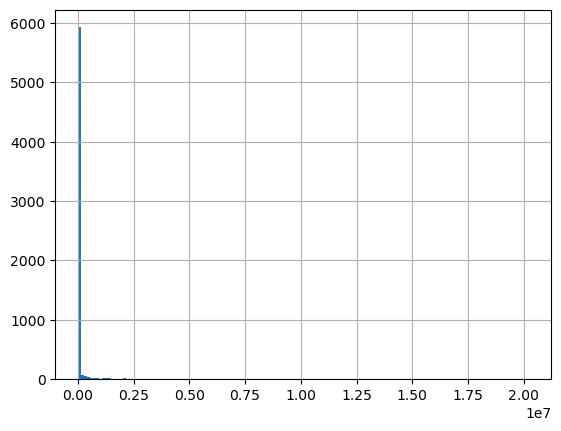

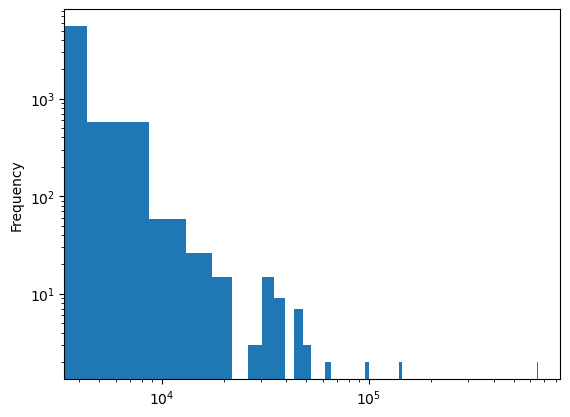

In [51]:
DataBase_user['followers_count'].hist(bins = 150,log=False)
plt.show()
DataBase_user['friends_count'].plot(kind="hist", logy=True,bins = 150,logx=True)
plt.show()

## <font color='red'> Homework: </font>
This is a long tail distribution. As appears often in social networks, see wikipedia section on **occurence and applications** of https://en.wikipedia.org/wiki/Pareto_distribution.
* Write a small account.

### <font color='blue'> Answer: </font>
A long tail distribution occurs when there is literally a long tail to the left of the distribution, similar to the concept of an asymptote.<br>
In statistics this can be seen when the median value (as explained before the value that is in the middle of the distribution, splits in half all the smaples) is by far smaller than the mean. <br>
This is caused when there are really big (and obviously few) outliers that contribute a lot to the mean.

In [52]:
print(DataBase_user.dtypes)

name               object
location           object
followers_count     int64
friends_count       int64
dtype: object


##  Creation of the nodes of the Graph.
* In this case it is the users' id. 
* Add  information to the node such as number of followers
* **DataFrame.iterrows()**, usefull instruction for processing the rows sequentially

In [53]:
for row in DataBase_user.iterrows():
    info = row[1]
    g.add_node(info['name'], followers = info['followers_count'])


In [55]:
info

name               Vetenskapsakademien
location                     Stockholm
followers_count                   5095
friends_count                      454
Name: 6299, dtype: object

In [56]:
print(g)

DiGraph with 2416 nodes and 0 edges


## Plot the graph
Only the nodes.
# Important in case of error libraries scipy and networkx should be updated

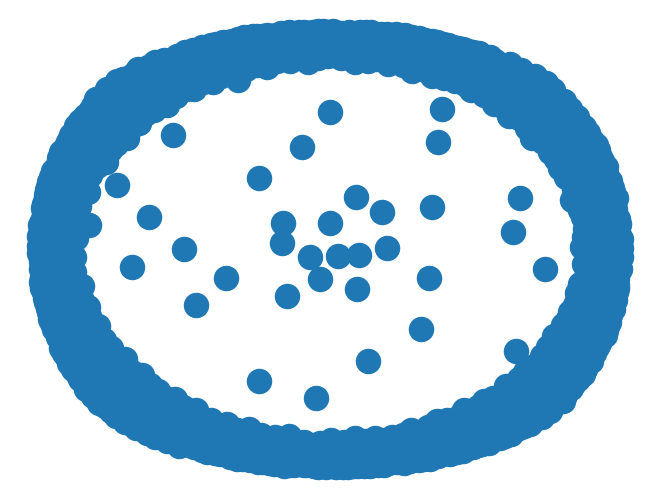

In [58]:
nx.draw(g)

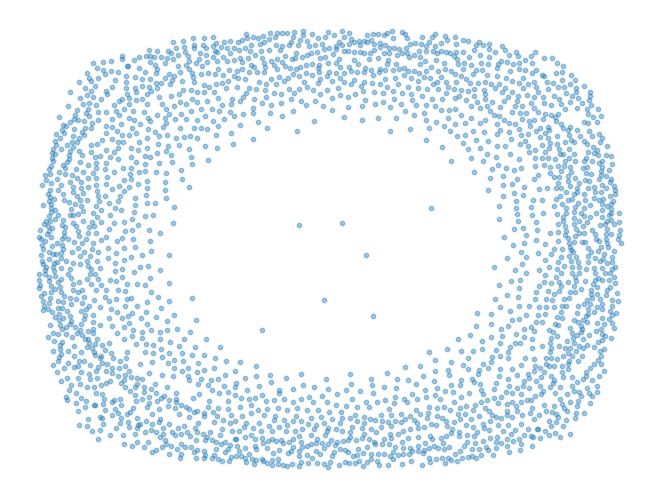

In [59]:
pos = nx.spring_layout(g, iterations=10)
nx.draw(g, pos, node_size=10, alpha=0.4, edge_color='r')
plt.show()

Look for equations of center of mass (wikipedia, physics books)

### <font color='blue'> Answer: </font>
The center of mass is the point about which the entire mass of the system is distributed.<br>
R = (1/M) * sum(mi*ri) <br>

Where mi is the mass of each particle and ri its coordinates